# Viscoelasticity

FILE: viscoelastic_models.ipynb

AUTHOR: R Ellingham

DATE: Nov 2020

PROGRAM DESC: 
This document looks at the basic theory behind viscoelasticity, with the intention of using this theory to model a carbon-black silicone rubber comoposite. The document will be broken down into sections:

TODO:
* ...
* ...

*Part 1*
* General overview of viscoelasticity
* Maxwell models
* Kelvin-Voight models
* Generalised viscoelastic constitutive models
* Quasi-linear viscoelastic model
* How to fit these models to experimental data

*Part 2*
* Macro vs. micro modelling of viscoelasticity

*Part 3*
* Percolation modelling
* Composite resistivity modelling

In [9]:
## import libraries
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MaxNLocator
from matplotlib import cm # colour map
import numpy as np
from scipy import optimize

SyntaxError: invalid syntax (<ipython-input-9-353b06b0492d>, line 6)

## General overview

A viscoelastic material displays a loss of energy when ungoing a stress loading and unloading condition. This loss of energy is due to the damping (or viscous) properties of the material as opposed to an ideal elastic material which stores the strain energy as elastic energy. 

<img src=stress-strain-hysteresis-curve.PNG width=400>

This viscoelastiv behavious is desriable for use in systems which require damping and shock absorption, such as in car suspension systems, shipping packing materials and running shoes.

There are two key characteristics of viscoelastic materials, stress relaxation and strain creep.

*Stress relaxation* and *Strain creep* are the time dependent stress and strain responses to a step input of strain and stress on a material, respectively.

<figure>
  <img src="relaxation-sketch.PNG" width=300>
  <figcaption>Stress relaxation curve</figcaption>
  <img src="Creep-sketch.PNG" width=300>
  <figcaption>Strain creep curve</figcaption>
</figure>

# Maxwell Model #
<figure>
  <img src="maxwell-sketch.PNG" width=300>
  <figcaption>Mechanical representation of the Maxwell model of a viscoelastic material with spring constant, $E$ and damping factor $\mu$</figcaption>
</figure>

\begin{equation*}
\dot{u}(t)=\frac{\dot{F_s}(t)}{E}+\frac{F_d(t)}{\mu} \newline
\therefore q_1\dot{\varepsilon} = p_0\dot{\sigma}+p_1\sigma
\end{equation*}

Where $u(t)$, $F_s$ and $F_d$ are the overall stretch, spring force, and dashpot force respectively. $q_1, p_0, and p_1$ are all constants relating to the elasticity and damping parameters of the material.

\begin{equation*}
q_1 = 1 \rightarrow Dim = 1 \newline
p_1 = \frac{1}{\mu} \rightarrow Dim = \frac{[m]}{[N][s]} \newline
p_0 = \frac{1}{E} \rightarrow Dim = \frac{[m]}{[N]}
\end{equation*}


## Stress relaxation ##

For a constant strain step input the general dynamic Maxwell equation becomes:

\begin{equation*}
0 = \dot{\sigma} + \frac{p_1}{p_0}\sigma
\end{equation*}

The solution for this $1^{st}$ order ODE is:

\begin{equation*}
\sigma = C_1e^{-\frac{p_1}{p_0}t}
\end{equation*}

To solve for $C_1$ we integrate equation (1) from $t=0^-$ to $t=0^+$ and obtain:

\begin{equation*}
\sigma(t=0) = \sigma_0 = C_1 = \frac{q_1}{p_0}\varepsilon_0 = E\varepsilon_0 \newline
\therefore \sigma(t) = E\varepsilon_0e^{-\frac{E}{\mu}t}
\end{equation*}

Text(0, 0.5, 'b=Stress, o=Strain')

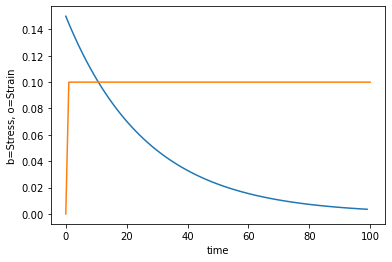

In [38]:
# Step function for general use (only approximate,no 0- and 0+)
step_input = lambda x,steps : np.append(np.zeros(1),np.linspace(x,x,steps))
# Stress relaxation function for Maxwell model
maxwell_stress_lax = lambda e0,E,mu,t : E*e0*np.exp(-(E/mu)*t)
e0 = 0.1
E = 1.5
mu = 4
steps = 100
t = np.linspace(0,10,steps)
plt.plot(maxwell_stress_lax(e0,E,mu,t))
plt.plot(step_input(e0,steps))
plt.xlabel('time')
plt.ylabel('b=Stress, o=Strain')

## Strain creep ##

For a constant stress step input the general dynamic Maxwell equation becomes:

\begin{equation*}
q_1\dot{\varepsilon} = p_1\sigma
\end{equation*}

We integrate over $0^-$ to $t$ to get:

\begin{equation*}
\varepsilon(t) = \frac{p_1}{q_1}\sigma_0t + C_1
\end{equation*}

Given the ICs previously found for the Stress relaxation:
\begin{equation*}
\varepsilon(t=0) = \varepsilon_0 = \frac{p_0}{q_1}\sigma_0 = C_1
\therefore \varepsilon
\end{equation*}

# Kelvin-Voight Model #
<figure>
  <img src="kelvin-voight-sketch.PNG" width=300>
  <figcaption>Mechanical representation of the Kelvin-Voight model</figcaption>
</figure>